In [1]:
from Model.DCVAE import DCVAE
from Model.Utils import LoadMPS45,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np
%matplotlib notebook

/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/smith/miniconda3/envs/tensorflowGPU/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may in

# Load DataSet

In [2]:
x_train1,x_test1=LoadMPS45(dirBase='DataSet/MPS-45.mat');
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

# Create Convolutional Variational Autoencoder

In [3]:
model = DCVAE(input_shape=(45, 45, 2),filters=[32,32,16],strides=[2,2,1],hidden_dim=1024,
               latent_cont_dim=600,opt=RMSprop(lr=0.001),dropout=0.1)

# Training Network

In [4]:
model.fit(x_train, num_epochs=1000,batch_size=256,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 45, 45, 2)    18          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 23, 23, 32)   288         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 12, 12, 32)   9248        conv2d_2[0][0]                   
_________________________________________________________________________________________


Epoch 00086: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



Epoch 00111: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.



Epoch 00144: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.



Epoch 00149: ReduceLROnPlateau reducing learning rate to 5e-07.



# Ploting Train History

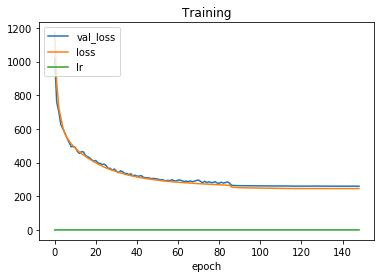

In [5]:
PlotHistory(model.history.history) 

# Evaluate Model with Test dataset 

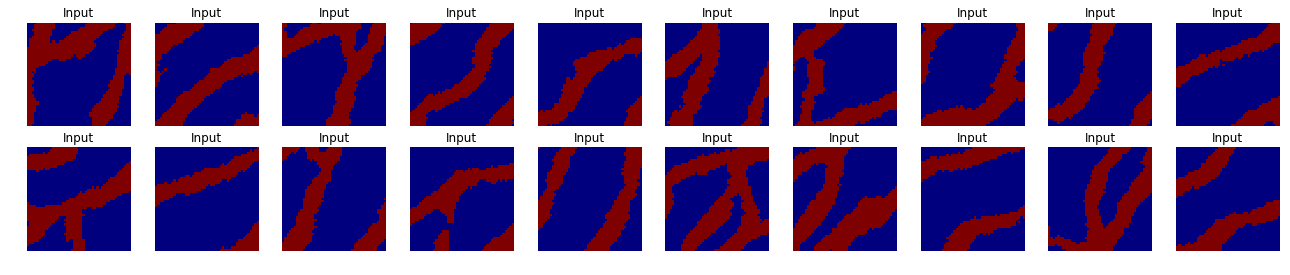

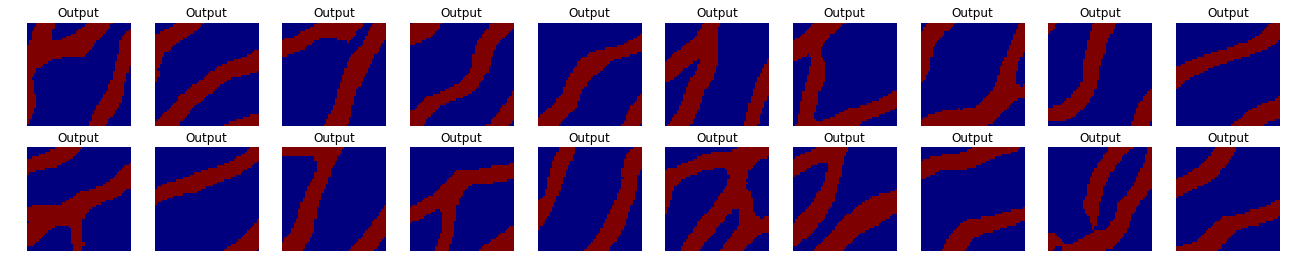

In [6]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=45)

# Generate random sampling

<Figure size 1620x1620 with 0 Axes>

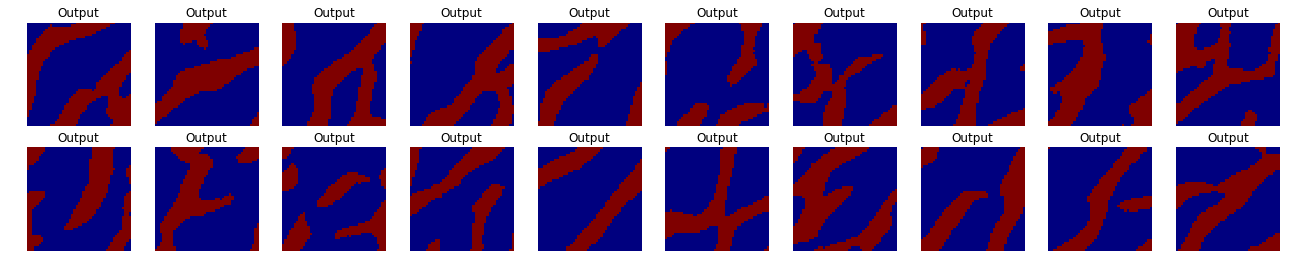

In [7]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=45,Only_Result=False)